# Preprocessing Boston Airbnb data

# 1. Import libraries 

In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

# 2. Read in data and take a first look

In [481]:
# read data
data =  pd.read_csv('Boston Airbnb/listings.csv', sep=',')
listings_df = data.copy()

# display all columns at once
pd.set_option('display.max_columns', 100)
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

### take a look at the size of the data --> approx. 3600 rows and 95 columns

In [482]:
# data shape
listings_df.shape

(3585, 95)

### data columns...many columns seem to be of no interest for us

In [483]:
# data columns
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# 3. Important columns / Columns of interest

## 3a. Remove columns with >= 98% NaN

In [484]:
# means of missing values
listings_df.isnull().mean().sort_values(ascending=False).head(10)

neighbourhood_group_cleansed    1.000000
jurisdiction_names              1.000000
license                         1.000000
has_availability                1.000000
square_feet                     0.984379
monthly_price                   0.752301
weekly_price                    0.751185
security_deposit                0.625662
notes                           0.550907
interaction                     0.433473
dtype: float64

In [485]:
# find columns with >= 98% NaN's
print('listings_df shape = {}'.format(listings_df.shape))
index1 = np.where(listings_df.isnull().mean()>=0.98)[0]
drop_cols = listings_df.columns[index1]

print('')
print('drop_columns = {}'.format(drop_cols))

# remove said columns
listings_df_reduced = listings_df.drop(columns=drop_cols)
print('')
print('listings_df_reduced shape without >= 98% NaN columns = {}'.format(listings_df_reduced.shape))

listings_df shape = (3585, 95)

drop_columns = Index(['neighbourhood_group_cleansed', 'square_feet', 'has_availability',
       'license', 'jurisdiction_names'],
      dtype='object')

listings_df_reduced shape without >= 98% NaN columns = (3585, 90)


In [486]:
# take another look at the data
listings_df_reduced.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Ap

In [487]:
# ... and its columns
listings_df_reduced.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
      

# 3b. Select columns of possible interest (resp. drop columns of no interest)

In [488]:
# columns of interest
cols_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
                'space', 'description', 'experiences_offered', 'neighborhood_overview',
                'notes', 'transit', 'access', 'interaction', 'house_rules',
                'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
                'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
                'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
                'host_verifications', 'street', 'neighbourhood', 'city', 'state', 'zipcode',
                'market', 'smart_location', 'country_code', 'country', 'amenities', 
                'weekly_price', 'monthly_price', 'calendar_updated', 'availability_30', 
                'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                'first_review', 'last_review',]

In [489]:
# select columns of interest
listings_df_reduced = listings_df_reduced.drop(columns=cols_to_drop)
listings_df_reduced.shape

(3585, 41)

In [490]:
# look at the data
listings_df_reduced.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,NaN,NaN,NaN,f,1,1,t,f,Roslindale,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,$250.00,NaN,$35.00,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,within an hour,100%,100%,f,1,1,t,t,Roslindale,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,$95.00,$10.00,0,$0.00,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,within a few hours,100%,88%,t,1,1,t,t,Roslindale,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,NaN,NaN,1,$20.00,3,45,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,within a few hours,100%,50%,f,1,1,t,f,Roslindale,42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,$75.00,$100.00,$50.00,2,$25.00,1,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,within an hour,100%,100%,t,1,1,t,t,Roslindale,42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,$79.00,NaN,$15.00,1,$0.00,2,31,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25


In [491]:
# data types of columns
listings_df_reduced.dtypes.sort_values()

maximum_nights                        int64
number_of_reviews                     int64
guests_included                       int64
host_listings_count                   int64
host_total_listings_count             int64
calculated_host_listings_count        int64
minimum_nights                        int64
accommodates                          int64
review_scores_rating                float64
review_scores_accuracy              float64
review_scores_cleanliness           float64
beds                                float64
bedrooms                            float64
bathrooms                           float64
reviews_per_month                   float64
review_scores_location              float64
longitude                           float64
latitude                            float64
review_scores_value                 float64
review_scores_checkin               float64
review_scores_communication         float64
requires_license                     object
instant_bookable                

In [492]:
# check for missing values
listings_df_reduced.isnull().mean().sort_values()

requires_license                    0.000000
minimum_nights                      0.000000
extra_people                        0.000000
guests_included                     0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
price                               0.000000
bed_type                            0.000000
instant_bookable                    0.000000
accommodates                        0.000000
maximum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood_cleansed              0.000000
host_identity_verified              0.000000
host_has_profile_pic                0.000000
host_total_listings_count           0.000000
host_listings_count                 0.000000
host_is_superhost                   0.000000
require_guest_profile_picture       0.000000
cancellation_policy                 0.000000
is_locatio

# 3c. Observations:
* price & extra_people have no missing values
* cleaning_fee and security_deposit have missing values but we assume that missing values correspond to 0 USD
* extra_people, cleaning_fee, security_deposit & price are listed as strings/objects, due to the "$" sign. We should convert these columns to float
* it does not clearly state if price is per night or per minimum nights resp. per 1 Person or for more people --> we need to make some assumptions

# 4. Convert prices and fees to float

In [493]:
def convert_prices_and_fees_to_float(df, price_and_fees_cols):
    """
    function to convert price/fee columns to float
    """
    
    # fill missing values with 0
    df[price_and_fees_cols] = df[price_and_fees_cols].fillna('$0.0')
    
    # remove '$' and ',' symbols
    for col_temp in price_and_fees_cols:
        df[col_temp] = df[col_temp].apply(lambda x: x.replace('$', '').replace(',','')).astype(float)
    
    return df

In [494]:
# call function above
price_and_fees_cols = ['extra_people', 'price', 'cleaning_fee', 'security_deposit']
listings_df_reduced = convert_prices_and_fees_to_float(listings_df_reduced, price_and_fees_cols)

In [495]:
# check if missing values were replaced
listings_df_reduced.isnull().mean().sort_values()

security_deposit                    0.000000
cancellation_policy                 0.000000
number_of_reviews                   0.000000
maximum_nights                      0.000000
minimum_nights                      0.000000
extra_people                        0.000000
guests_included                     0.000000
cleaning_fee                        0.000000
calculated_host_listings_count      0.000000
price                               0.000000
bed_type                            0.000000
instant_bookable                    0.000000
room_type                           0.000000
accommodates                        0.000000
is_location_exact                   0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood_cleansed              0.000000
host_identity_verified              0.000000
host_has_profile_pic                0.000000
host_total_listings_count           0.000000
host_listings_count                 0.000000
host_is_su

In [496]:
# check if prices and fees are float now
listings_df_reduced.dtypes.sort_values()

guests_included                       int64
accommodates                          int64
host_listings_count                   int64
host_total_listings_count             int64
minimum_nights                        int64
maximum_nights                        int64
calculated_host_listings_count        int64
number_of_reviews                     int64
security_deposit                    float64
cleaning_fee                        float64
extra_people                        float64
review_scores_rating                float64
review_scores_cleanliness           float64
review_scores_checkin               float64
review_scores_communication         float64
review_scores_location              float64
review_scores_value                 float64
review_scores_accuracy              float64
price                               float64
reviews_per_month                   float64
beds                                float64
bedrooms                            float64
bathrooms                       

# 4a. add a total_price column 
* We assume "price" is the price per night per airbnb. We add a total_price column (price+cleaning_fee/minimum_nights) which is supposed to break down the cleaning fee and evenly add it to the price per night.
* Obsivously in this case we assume that people stay for a minimum_nights amount of nights (which may not be 100% correct but we do not have much more information on that)

In [497]:
# calculate total price per night as price + cleaning_fee evenly distributed over the minimum_nights 
listings_df_reduced['total_price_per_night'] = listings_df_reduced['price']+listings_df_reduced['cleaning_fee']/listings_df_reduced['minimum_nights']
listings_df_reduced[['price', 'cleaning_fee', 'minimum_nights','total_price_per_night']][:10]

,price,cleaning_fee,minimum_nights,total_price_per_night
0,250.0,35.0,2,267.5
1,65.0,10.0,2,70.0
2,65.0,0.0,3,65.0
3,75.0,50.0,1,125.0
4,79.0,15.0,2,86.5
5,75.0,30.0,2,90.0
6,100.0,0.0,1,100.0
7,75.0,10.0,1,85.0
8,58.0,0.0,2,58.0
9,229.0,50.0,4,241.5


# 5. Take another look at the data

In [498]:
# look at the data
listings_df_reduced.head(10)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
0,NaN,NaN,NaN,f,1,1,t,f,Roslindale,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,0.0,35.0,1,0.0,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN,267.5
1,within an hour,100%,100%,f,1,1,t,t,Roslindale,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,95.0,10.0,0,0.0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30,70.0
2,within a few hours,100%,88%,t,1,1,t,t,Roslindale,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,0.0,0.0,1,20.0,3,45,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47,65.0
3,within a few hours,100%,50%,f,1,1,t,f,Roslindale,42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,100.0,50.0,2,25.0,1,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00,125.0
4,within an hour,100%,100%,t,1,1,t,t,Roslindale,42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,0.0,15.0,1,0.0,2,31,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25,86.5
5,within a few hours,100%,95%,t,2,2,t,t,Roslindale,42.291690,-71.131893,t,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,75.0,0.0,30.0,1,0.0,2,1125,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,f,f,1,1.70,90.0
6,within an hour,98%,96%,f,5,5,t,t,Roslindale,42.281390,-71.131190,f,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,100.0,0.0,0.0,1,25.0,1,1125,57,90.0,10.0,10.0,10.0,10.0,9.0,9.0,f,f,strict,f,f,3,4.00,100.0
7,within a few hours,100%,100%,t,2,2,t,t,Roslindale,42.281946,-71.141022,t,House,Private room,2,2.0,1.0,1.0,Real Bed,75.0,0.0,10.0,1,15.0,1,1125,67,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,t,t,2,2.38,85.0
8,within an hour,100%,100%,t,1,1,t,t,Roslindale,42.285878,-71.124910,t,Condominium,Private room,2,1.0,1.0,2.0,Real Bed,58.0,0.0,0.0,2,0.0,2,1125,65,96.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,moderate,f,f,1,5.36,58.0
9,within an hour,100%,100%,t,2,2,t,t,Roslindale,42.288820,-71.139510,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,229.0,200.0,50.0,4,25.0,4,10,33,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f,strict,f,f,2,1.01,241.5


In [499]:
# data shape
listings_df_reduced.shape

(3585, 42)

# 6. Convert True/False (t/f) columns to 1/0 

In [500]:
def convert_true_false_to_1_0(df, true_false_columns):
    """
    function to convert boolean columns (true/false) to integer columns with 1/0
    """
    for col_temp in true_false_columns:
        df[col_temp] = df[col_temp].apply(lambda x: x.replace('t', '1').replace('f','0')).astype(int)
    
    return df

In [501]:
# call function just above and convert columns
true_false_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
                      'is_location_exact', 'requires_license', 'instant_bookable', 'require_guest_profile_picture',
                     'require_guest_phone_verification']

listings_df_reduced = convert_true_false_to_1_0(listings_df_reduced, true_false_columns)

In [502]:
listings_df_reduced.head(10)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
0,NaN,NaN,NaN,0,1,1,1,0,Roslindale,42.282619,-71.133068,1,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,0.0,35.0,1,0.0,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,moderate,0,0,1,NaN,267.5
1,within an hour,100%,100%,0,1,1,1,1,Roslindale,42.286241,-71.134374,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,95.0,10.0,0,0.0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,0,1,moderate,0,0,1,1.30,70.0
2,within a few hours,100%,88%,1,1,1,1,1,Roslindale,42.292438,-71.135765,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,0.0,0.0,1,20.0,3,45,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,0,moderate,1,0,1,0.47,65.0
3,within a few hours,100%,50%,0,1,1,1,0,Roslindale,42.281106,-71.121021,0,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,100.0,50.0,2,25.0,1,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,moderate,0,0,1,1.00,125.0
4,within an hour,100%,100%,1,1,1,1,1,Roslindale,42.284512,-71.136258,1,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,0.0,15.0,1,0.0,2,31,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,flexible,0,0,1,2.25,86.5
5,within a few hours,100%,95%,1,2,2,1,1,Roslindale,42.291690,-71.131893,1,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,75.0,0.0,30.0,1,0.0,2,1125,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,flexible,0,0,1,1.70,90.0
6,within an hour,98%,96%,0,5,5,1,1,Roslindale,42.281390,-71.131190,0,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,100.0,0.0,0.0,1,25.0,1,1125,57,90.0,10.0,10.0,10.0,10.0,9.0,9.0,0,0,strict,0,0,3,4.00,100.0
7,within a few hours,100%,100%,1,2,2,1,1,Roslindale,42.281946,-71.141022,1,House,Private room,2,2.0,1.0,1.0,Real Bed,75.0,0.0,10.0,1,15.0,1,1125,67,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,moderate,1,1,2,2.38,85.0
8,within an hour,100%,100%,1,1,1,1,1,Roslindale,42.285878,-71.124910,1,Condominium,Private room,2,1.0,1.0,2.0,Real Bed,58.0,0.0,0.0,2,0.0,2,1125,65,96.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,moderate,0,0,1,5.36,58.0
9,within an hour,100%,100%,1,2,2,1,1,Roslindale,42.288820,-71.139510,1,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,229.0,200.0,50.0,4,25.0,4,10,33,94.0,10.0,9.0,10.0,10.0,9.0,9.0,0,0,strict,0,0,2,1.01,241.5


In [503]:
# check if true/false columns were converted to 1/0 (int)
listings_df_reduced.dtypes.sort_values()

is_location_exact                     int32
require_guest_phone_verification      int32
host_is_superhost                     int32
host_has_profile_pic                  int32
host_identity_verified                int32
require_guest_profile_picture         int32
instant_bookable                      int32
requires_license                      int32
maximum_nights                        int64
number_of_reviews                     int64
accommodates                          int64
minimum_nights                        int64
host_total_listings_count             int64
host_listings_count                   int64
calculated_host_listings_count        int64
guests_included                       int64
review_scores_value                 float64
review_scores_location              float64
review_scores_communication         float64
review_scores_checkin               float64
review_scores_cleanliness           float64
review_scores_accuracy              float64
review_scores_rating            

In [504]:
# check which columns still have missing values
listings_df_reduced.isnull().sum().sort_values()

security_deposit                      0
calculated_host_listings_count        0
require_guest_phone_verification      0
require_guest_profile_picture         0
cancellation_policy                   0
instant_bookable                      0
requires_license                      0
number_of_reviews                     0
maximum_nights                        0
minimum_nights                        0
extra_people                          0
guests_included                       0
cleaning_fee                          0
price                                 0
bed_type                              0
total_price_per_night                 0
latitude                              0
host_listings_count                   0
host_is_superhost                     0
host_identity_verified                0
neighbourhood_cleansed                0
host_total_listings_count             0
longitude                             0
host_has_profile_pic                  0
room_type                             0


# 7. Remove/Impute observations with missing values 

##### We are going to remove missing values in the following columns (because these columns are important for the model later on and can not be imputed in a useful way):
* property_type
* beds
* bedrooms
* bathrooms

In [505]:
# drop columns with missing values in the 4 mentioned columns
listings_df_reduced = listings_df_reduced.dropna(subset=['property_type', 'beds', 'bedrooms', 'bathrooms'])

In [506]:
# data shape
listings_df_reduced.shape

(3554, 42)

### We reduced our dataset from 3585 rows to 3554 rows which means we removed 31 observations

In [507]:
# check which columns still have missing values
listings_df_reduced.isnull().sum().sort_values()

security_deposit                      0
calculated_host_listings_count        0
require_guest_phone_verification      0
require_guest_profile_picture         0
cancellation_policy                   0
instant_bookable                      0
requires_license                      0
number_of_reviews                     0
maximum_nights                        0
minimum_nights                        0
extra_people                          0
guests_included                       0
cleaning_fee                          0
price                                 0
bed_type                              0
beds                                  0
total_price_per_night                 0
bathrooms                             0
accommodates                          0
room_type                             0
property_type                         0
is_location_exact                     0
longitude                             0
latitude                              0
neighbourhood_cleansed                0


### For some reason there are airbnbs that do not have beds (although bed_type='Real Bed')?? We want to remove those observations

In [508]:
np.unique(listings_df_reduced['beds'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 16.])

In [509]:
listings_df_reduced[listings_df_reduced['beds']==0].head(10)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
1272,within a few hours,71%,98%,0,363,363,1,1,Back Bay,42.348924,-71.081273,1,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,199.0,300.0,75.0,2,10.0,3,1125,21,93.0,10.0,9.0,9.0,10.0,10.0,10.0,0,1,strict,0,0,58,1.74,224.000000
1276,within a few hours,71%,98%,0,363,363,1,1,Back Bay,42.349367,-71.081995,1,Apartment,Entire home/apt,2,1.0,0.0,0.0,Real Bed,199.0,400.0,75.0,2,10.0,3,1125,17,86.0,9.0,9.0,10.0,10.0,10.0,9.0,0,1,strict,0,0,58,1.52,224.000000
3321,within a few hours,71%,98%,0,363,363,1,1,Allston,42.364443,-71.130584,1,Condominium,Entire home/apt,2,1.0,0.0,0.0,Real Bed,168.0,400.0,95.0,0,10.0,3,1125,2,80.0,9.0,9.0,6.0,7.0,7.0,8.0,0,1,moderate,0,0,58,0.36,199.666667
3508,within a few hours,71%,98%,0,363,363,1,1,Allston,42.348511,-71.132824,1,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,139.0,400.0,80.0,0,10.0,3,1125,10,90.0,9.0,10.0,9.0,9.0,10.0,9.0,0,1,strict,0,0,58,1.14,165.666667


In [510]:
# remove observations where "beds=0"
listings_df_reduced = listings_df_reduced[listings_df_reduced['beds'] > 0]

# data shape
listings_df_reduced.shape

(3550, 42)

###### We removed another 4 observations

### We still have missing values in the review columns and host response/acceptance columns

In [511]:
# check which columns still have missing values
listings_df_reduced.isnull().sum().sort_values()

security_deposit                      0
calculated_host_listings_count        0
require_guest_phone_verification      0
require_guest_profile_picture         0
cancellation_policy                   0
instant_bookable                      0
requires_license                      0
number_of_reviews                     0
maximum_nights                        0
minimum_nights                        0
extra_people                          0
guests_included                       0
cleaning_fee                          0
price                                 0
bed_type                              0
beds                                  0
total_price_per_night                 0
bathrooms                             0
accommodates                          0
room_type                             0
property_type                         0
is_location_exact                     0
longitude                             0
latitude                              0
neighbourhood_cleansed                0


### We are going to impute the missing review scores with the mean of the corresponding columns

In [512]:
# all different review columns
reviews = [i for i in listings_df_reduced if 'review' in i] 
reviews

['number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [513]:
# mean function
fill_mean = lambda col: col.fillna(col.mean())

# fill missing values with mean of corresponding column
fill_df = listings_df_reduced.loc[:, reviews].apply(fill_mean, axis=0) 


In [514]:
# replace review columns with "mean-imputed" adjusted columns
listings_df_reduced.loc[:, reviews] = fill_df.loc[:, :]

In [515]:
listings_df_reduced[reviews].head(10)

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,1.977237
1,36,94.000000,10.000000,9.00000,10.000000,10.000000,9.000000,9.00000,1.300000
2,41,98.000000,10.000000,9.00000,10.000000,10.000000,9.000000,10.00000,0.470000
3,1,100.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,1.000000
4,29,99.000000,10.000000,10.00000,10.000000,10.000000,9.000000,10.00000,2.250000
5,8,100.000000,10.000000,10.00000,10.000000,10.000000,9.000000,10.00000,1.700000
6,57,90.000000,10.000000,10.00000,10.000000,10.000000,9.000000,9.00000,4.000000
7,67,96.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,2.380000
8,65,96.000000,10.000000,10.00000,10.000000,10.000000,9.000000,10.00000,5.360000
9,33,94.000000,10.000000,9.00000,10.000000,10.000000,9.000000,9.00000,1.010000


In [516]:
# data shape (obvisouly no loss of observations because we are only imputing values)
listings_df_reduced.shape

(3550, 42)

In [517]:
# check which columns still have missing values
listings_df_reduced.isnull().sum().sort_values()

security_deposit                      0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating                  0
review_scores_accuracy                0
review_scores_cleanliness             0
review_scores_checkin                 0
review_scores_communication           0
review_scores_location                0
review_scores_value                   0
requires_license                      0
instant_bookable                      0
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
guests_included                       0
cleaning_fee                          0
total_price_per_night                 0
price                                 0
host_is_superhost                     0
host_listings_count                   0
host_total_listings_count             0


### We still have missing values in the host acceptance/response columns. We are going to impute those observations

In [518]:
def convert_host_acceptance_and_response_columns_to_float_and_impute(df, host_cols):
    """
    function to convert host response/acceptance columns impute values 
    """
    for col_temp in host_cols:
        df[col_temp] = df[col_temp].map(lambda x: x.replace('%',''), na_action='ignore')
        df[col_temp] = df[col_temp].fillna(method="backfill")
        
    return df

In [519]:
# considered columns and call function just above
host_cols = ['host_acceptance_rate', 'host_response_rate', 'host_response_time']
listings_df_reduced = convert_host_acceptance_and_response_columns_to_float_and_impute(listings_df_reduced, host_cols)

# convert the rate-columns to float
listings_df_reduced[['host_acceptance_rate', 'host_response_rate']] = listings_df_reduced[['host_acceptance_rate', 'host_response_rate']].astype(float)

listings_df_reduced.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
0,within an hour,100.0,100.0,0,1,1,1,0,Roslindale,42.282619,-71.133068,1,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,0.0,35.0,1,0.0,2,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,moderate,0,0,1,1.977237,267.5
1,within an hour,100.0,100.0,0,1,1,1,1,Roslindale,42.286241,-71.134374,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,95.0,10.0,0,0.0,2,15,36,94.000000,10.000000,9.00000,10.000000,10.000000,9.000000,9.00000,0,1,moderate,0,0,1,1.300000,70.0
2,within a few hours,100.0,88.0,1,1,1,1,1,Roslindale,42.292438,-71.135765,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,0.0,0.0,1,20.0,3,45,41,98.000000,10.000000,9.00000,10.000000,10.000000,9.000000,10.00000,0,0,moderate,1,0,1,0.470000,65.0
3,within a few hours,100.0,50.0,0,1,1,1,0,Roslindale,42.281106,-71.121021,0,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,100.0,50.0,2,25.0,1,1125,1,100.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,0,0,moderate,0,0,1,1.000000,125.0
4,within an hour,100.0,100.0,1,1,1,1,1,Roslindale,42.284512,-71.136258,1,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,0.0,15.0,1,0.0,2,31,29,99.000000,10.000000,10.00000,10.000000,10.000000,9.000000,10.00000,0,0,flexible,0,0,1,2.250000,86.5


In [520]:
# Now we converted many columns to int and float. Everything that is still of type "object" will be converted to dummies later
listings_df_reduced.dtypes.sort_values()

is_location_exact                     int32
require_guest_phone_verification      int32
host_is_superhost                     int32
host_has_profile_pic                  int32
host_identity_verified                int32
require_guest_profile_picture         int32
instant_bookable                      int32
requires_license                      int32
maximum_nights                        int64
number_of_reviews                     int64
accommodates                          int64
minimum_nights                        int64
host_total_listings_count             int64
host_listings_count                   int64
calculated_host_listings_count        int64
guests_included                       int64
review_scores_value                 float64
review_scores_location              float64
review_scores_communication         float64
review_scores_checkin               float64
review_scores_cleanliness           float64
review_scores_accuracy              float64
review_scores_rating            

In [521]:
# And we finally do not have missing values anymore
listings_df_reduced.isnull().sum().sort_values()

host_response_time                  0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_scores_checkin               0
review_scores_communication         0
review_scores_location              0
review_scores_value                 0
requires_license                    0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
guests_included                     0
cleaning_fee                        0
security_deposit                    0
price                               0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_total_l

### Now we have no missing values left in the dataset

# 8. Distributions & Correlations in the data

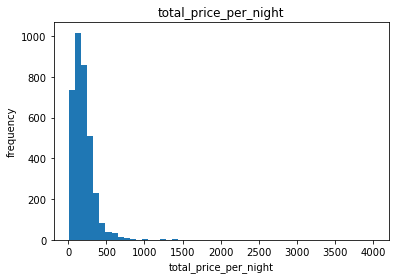

In [522]:
# histogram of "total_price_per_night"
plt.figure()
plt.hist(listings_df_reduced['total_price_per_night'], bins= 50)
plt.xlabel('total_price_per_night')
plt.ylabel('frequency')
plt.title('total_price_per_night')
plt.show()

### We notive a right skewed distribution of the total_price_per_night (which will later on be our response variable). In this case we might want to think about a transformation (such as log or sqrt)

### Log transformed data

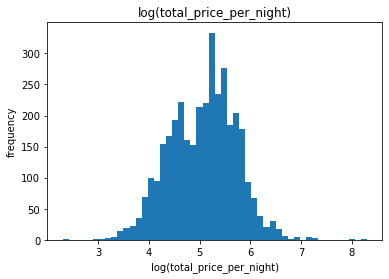

In [523]:
# histogram of the log of "total_price_per_night"
plt.figure()
plt.hist(np.log(listings_df_reduced['total_price_per_night']), bins= 50)
plt.xlabel('log(total_price_per_night)')
plt.ylabel('frequency')
plt.title('log(total_price_per_night)')
plt.show()

### We notice a log transformation seems to be a good one (will be done later in the other notebook when fitting the model)

In [524]:
# Take a look at the lowest prices
min_price = min(listings_df_reduced['total_price_per_night'])

print('Minimum price per night = {}'.format(min_price))

listings_df_reduced.sort_values(by=['total_price_per_night']).head()


Minimum price per night = 10.0


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
2033,within an hour,100.0,100.0,0,1,1,1,1,Downtown,42.360424,-71.061496,0,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,10.0,0.0,0.0,1,0.0,1,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,flexible,0,0,1,1.977237,10.0
3468,within a day,90.0,100.0,0,1,1,1,0,Allston,42.348018,-71.136071,0,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,11.0,0.0,0.0,2,0.0,1,1125,12,96.000000,10.000000,9.00000,10.000000,10.000000,10.000000,10.00000,0,0,flexible,0,0,1,3.080000,11.0
471,within a few hours,92.0,42.0,0,1,1,1,0,Mission Hill,42.331024,-71.098539,0,Apartment,Shared room,1,1.0,1.0,1.0,Real Bed,20.0,0.0,0.0,1,0.0,1,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,flexible,0,0,1,1.977237,20.0
267,within an hour,67.0,100.0,0,1,1,1,0,Jamaica Plain,42.307311,-71.103397,0,Apartment,Shared room,1,1.0,1.0,1.0,Real Bed,22.0,0.0,0.0,1,0.0,1,1,1,60.000000,8.000000,6.00000,10.000000,8.000000,8.000000,8.00000,0,0,flexible,0,0,1,1.000000,22.0
382,within a few hours,100.0,50.0,0,1,1,1,1,Jamaica Plain,42.298709,-71.112510,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,25.0,0.0,0.0,1,20.0,1,10,2,80.000000,8.000000,6.00000,9.000000,9.000000,8.000000,8.00000,0,1,flexible,0,0,1,0.190000,25.0


In [525]:
# Take a look a the highest prices
max_price = max(listings_df_reduced['total_price_per_night'])

print('Maximum price per night = {}'.format(max_price))

listings_df_reduced.sort_values(by=['total_price_per_night'], ascending=False).head()

Maximum price per night = 4000.0


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
2285,within a few hours,100.0,50.0,0,1,1,1,0,Fenway,42.347934,-71.097580,1,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,4000.0,0.0,0.0,2,50.0,6,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,strict,0,0,1,1.977237,4000.0
3055,within a few hours,98.0,55.0,0,1,1,1,0,South Boston Waterfront,42.348358,-71.039875,1,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,3000.0,0.0,0.0,1,0.0,1,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,flexible,0,0,1,1.977237,3000.0
793,within a few hours,100.0,100.0,0,1,1,1,0,Roxbury,42.338626,-71.083315,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1400.0,0.0,0.0,1,0.0,1,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,flexible,0,0,1,1.977237,1400.0
1950,within an hour,100.0,100.0,0,5,5,1,1,Beacon Hill,42.358363,-71.068408,0,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,1345.0,0.0,65.0,1,0.0,2,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,1,super_strict_30,0,0,5,1.977237,1377.5
2204,within a few hours,90.0,71.0,0,1,1,1,0,Fenway,42.345201,-71.088918,1,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,1372.0,0.0,0.0,1,0.0,1,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,flexible,0,0,1,1.977237,1372.0


In [526]:
### We have prices in the range from 10USD to 4000USD. In my opinion Airbnbs are mostly booked by younger people (which are usually not the rich age group). Therefore we want to remove Airbnbs that are too expensive, let's say where 'total_price_per_night > 500'. We also want to remove Airbnbs that are too cheap, e.g. 'total_price_per_night < 20'
### Moreover Airbnbs with really high security deposits (let's say >500 USD) will be removed

# 8a. Outliers

### The data seems to contain some outliers. We are going to remove:
* total_price_per_night > 500 USD or total_price_per_night < 20 USD (Reason: Airbnbs are mostly booked by younger people (which are usually not the rich age group))
* security_deposit > 500 (Reason: People do not like to pay very high security deposits)
* bathrooms >= 5 (Reason: Take a look at the table just below...some Airbnbs have 5 or more bathrooms but only 1 bed...this seems weird to me)
* accommodates > 6 (Reason: Airbnbs in Boston are probably booked for a city trip for a couple of days. People usually do not go on city trips with too many people. Maybe a car full of people (5-6 people tops))
* minimum_nights >= 30 (Reason: Sometimes it might actually be useful to stay for a month, but most of the time people only tend to stay a few days. Everything more than 30 days is weird to me)

### Why do some places have so many bathrooms??

In [527]:
listings_df_reduced[(listings_df_reduced['bathrooms'] >= 5)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
3051,within a few hours,98.0,55.0,0,749,749,1,1,South Boston Waterfront,42.349014,-71.039344,1,Apartment,Entire home/apt,5,5.0,2.0,2.0,Real Bed,399.0,0.0,100.0,1,0.0,3,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,strict,0,0,136,1.977237,432.333333
3116,within a day,98.0,68.0,0,24,24,1,1,South Boston Waterfront,42.343309,-71.055465,1,Other,Private room,2,6.0,1.0,1.0,Real Bed,220.0,200.0,0.0,1,0.0,2,1125,6,87.000000,9.000000,10.00000,9.000000,9.000000,9.000000,9.00000,0,0,strict,0,0,24,0.530000,220.000000
3235,within a few hours,98.0,66.0,0,22,22,1,1,South Boston,42.336750,-71.045372,1,Other,Private room,2,5.0,1.0,1.0,Real Bed,130.0,200.0,0.0,1,0.0,2,30,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,strict,0,0,19,1.977237,130.000000
3240,within a day,98.0,68.0,0,24,24,1,1,South Boston,42.341527,-71.057152,1,Other,Private room,2,6.0,1.0,1.0,Real Bed,144.0,200.0,0.0,1,0.0,2,1125,2,90.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,0,0,strict,0,0,24,0.270000,144.000000
3247,within a day,98.0,68.0,0,24,24,1,1,South Boston,42.336159,-71.045358,1,Other,Private room,2,5.0,1.0,1.0,Real Bed,105.0,200.0,0.0,1,0.0,2,30,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,strict,0,0,24,1.977237,105.000000
3249,within a day,98.0,68.0,0,24,24,1,1,South Boston,42.336617,-71.045420,1,Other,Private room,2,5.0,1.0,1.0,Real Bed,95.0,200.0,0.0,1,0.0,2,30,2,80.000000,10.000000,10.00000,8.000000,8.000000,9.000000,8.00000,0,0,strict,0,0,24,0.910000,95.000000
3254,within a few hours,98.0,66.0,0,22,22,1,1,South Boston,42.343317,-71.057384,1,Other,Private room,2,6.0,1.0,1.0,Real Bed,144.0,200.0,0.0,1,0.0,2,1125,1,60.000000,4.000000,4.00000,6.000000,6.000000,8.000000,6.00000,0,0,strict,0,0,19,0.370000,144.000000
3256,within a few hours,98.0,66.0,0,22,22,1,1,South Boston,42.336059,-71.045924,1,Other,Private room,2,5.0,1.0,1.0,Real Bed,95.0,200.0,0.0,1,0.0,2,30,2,90.000000,10.000000,8.00000,10.000000,10.000000,10.000000,8.00000,0,0,strict,0,0,19,0.920000,95.000000
3269,within a few hours,98.0,66.0,0,22,22,1,1,South Boston,42.343049,-71.055666,1,Other,Private room,2,6.0,1.0,1.0,Real Bed,144.0,200.0,0.0,1,0.0,2,1125,15,92.000000,10.000000,10.00000,10.000000,9.000000,9.000000,9.00000,0,0,strict,0,0,19,1.220000,144.000000


In [528]:
### Some places require a minimum amount of 90 or more nights, some even 300 nights. This seems a bit odd. We are going to remove observations with 90 or more nights  

In [529]:
listings_df_reduced['minimum_nights'].value_counts().sort_index()

1      1412
2       989
3       604
4       125
5        95
6        18
7       124
8         1
9         2
10       65
11        1
13        1
14       25
15       20
17        1
18        1
20        8
21        3
23        1
25        3
27        2
28        7
30       29
32        4
60        4
90        2
200       1
273       1
300       1
Name: minimum_nights, dtype: int64

In [530]:
# Minimum nights > 30
listings_df_reduced[(listings_df_reduced['minimum_nights'] > 30)]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
59,within a few hours,100.0,89.0,0,1,1,1,0,Jamaica Plain,42.316912,-71.113025,1,Bed & Breakfast,Private room,2,1.0,1.0,1.0,Real Bed,55.0,0.0,0.0,1,0.0,300,365,3,100.000000,10.000000,9.00000,9.000000,9.000000,10.000000,10.00000,0,0,flexible,0,0,1,0.060000,55.000000
985,within an hour,100.0,100.0,1,6,6,1,0,South End,42.344195,-71.073630,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.0,400.0,200.0,2,40.0,32,1125,15,89.000000,9.000000,10.00000,9.000000,9.000000,10.000000,9.00000,0,0,strict,0,1,4,0.400000,166.250000
1118,within an hour,100.0,100.0,1,6,6,1,0,South End,42.342858,-71.073393,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,170.0,400.0,200.0,2,40.0,32,1125,19,98.000000,10.000000,10.00000,10.000000,10.000000,10.000000,9.00000,0,0,strict,0,1,4,0.520000,176.250000
1153,within an hour,100.0,100.0,1,6,6,1,0,South End,42.344147,-71.072726,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.0,400.0,200.0,2,40.0,32,365,16,99.000000,9.000000,10.00000,10.000000,10.000000,10.000000,9.00000,0,0,strict,0,1,4,0.560000,191.250000
1243,within a day,70.0,93.0,0,7,7,1,1,Back Bay,42.353808,-71.078814,1,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,110.0,1000.0,150.0,1,0.0,60,365,3,93.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,0,0,strict,0,0,7,0.230000,112.500000
1344,within a day,70.0,93.0,0,7,7,1,1,Back Bay,42.353237,-71.079396,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,99.0,1500.0,150.0,1,0.0,90,365,2,90.000000,10.000000,10.00000,7.000000,9.000000,10.000000,10.00000,0,0,strict,0,0,7,0.130000,100.666667
1416,within a day,70.0,93.0,0,7,7,1,1,Back Bay,42.353579,-71.077798,1,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,130.0,1500.0,150.0,1,0.0,60,365,1,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,strict,0,0,7,0.390000,132.500000
1526,within a day,70.0,93.0,0,7,7,1,1,Back Bay,42.352919,-71.078985,1,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,130.0,1000.0,150.0,1,0.0,60,365,4,95.000000,10.000000,10.00000,10.000000,9.000000,10.000000,10.00000,0,0,strict,0,0,7,0.230000,132.500000
1761,within a few hours,100.0,100.0,1,1,1,1,1,Charlestown,42.379633,-71.061916,1,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,49.0,0.0,120.0,1,0.0,32,130,73,95.000000,10.000000,10.00000,9.000000,10.000000,9.000000,9.00000,0,0,moderate,1,1,1,1.990000,52.750000
1764,within a few hours,100.0,100.0,0,3,3,1,0,Charlestown,42.375255,-71.053309,1,Apartment,Entire home/apt,3,2.0,2.0,2.0,Real Bed,1000.0,1000.0,100.0,1,0.0,200,1125,0,91.975592,9.437089,9.26287,9.650712,9.653888,9.417185,9.17617,0,0,strict,0,0,2,1.977237,1000.500000


In [531]:
# Remove outliers
listings_df_reduced = listings_df_reduced[(listings_df_reduced['total_price_per_night'] >= 20) & (listings_df_reduced['total_price_per_night'] <= 500)]
listings_df_reduced = listings_df_reduced[(listings_df_reduced['security_deposit'] <= 500)]
listings_df_reduced = listings_df_reduced[(listings_df_reduced['bathrooms'] < 5)]
listings_df_reduced = listings_df_reduced[listings_df_reduced['accommodates'] <= 6]
listings_df_reduced = listings_df_reduced[listings_df_reduced['minimum_nights'] <= 30]
listings_df_reduced.shape

(3256, 42)

### We now reduced our dataset to 3260 observations

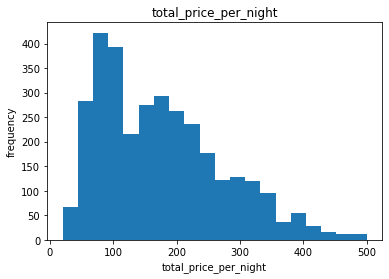

In [532]:
# Another look at the price distribution
plt.figure()
plt.hist(listings_df_reduced['total_price_per_night'], bins= 20)
plt.xlabel('total_price_per_night')
plt.ylabel('frequency')
plt.title('total_price_per_night')
plt.show()

# 8b. Transformation

### For the outlier-adjusted dataset, the square root seems to be a better transformation than the log (for later use)

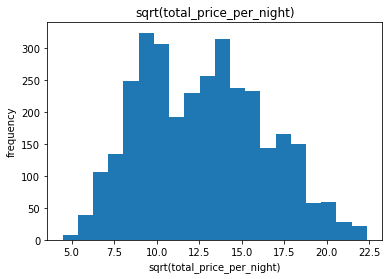

In [533]:
# Another look at the price distribution
plt.figure()
plt.hist(np.sqrt(listings_df_reduced['total_price_per_night']), bins= 20)
plt.xlabel('sqrt(total_price_per_night)')
plt.ylabel('frequency')
plt.title('sqrt(total_price_per_night)')
plt.show()

# 8c. Data overview

In [534]:
listings_df_reduced.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price_per_night
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3.256000e+03,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.0,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,95.182432,84.457924,0.110872,60.493857,60.493857,0.997850,0.726044,42.339887,-71.085241,0.856265,2.802826,1.177058,1.168305,1.476351,155.073403,85.128071,42.805283,1.345823,10.465909,2.827703,3.154514e+04,19.316953,91.913971,9.434929,9.254492,9.651730,9.652060,9.413920,9.179454,0.0,0.167383,0.019349,0.064189,13.041769,2.008098,175.619864
std,12.223641,21.651919,0.314022,175.008943,175.008943,0.046324,0.446055,0.024663,0.031830,0.350874,1.366644,0.406429,0.624086,0.733273,88.329778,144.845332,48.870790,0.860215,18.443722,3.837736,1.752485e+06,36.253760,8.498131,0.820053,1.040030,0.671696,0.642917,0.784456,0.890374,0.0,0.373375,0.137769,0.245127,30.261930,1.915968,97.717205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.235942,-71.171789,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.010000,20.000000
25%,97.000000,72.000000,0.000000,1.000000,1.000000,1.000000,0.000000,42.329719,-71.105663,1.000000,2.000000,1.000000,1.000000,1.000000,80.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.650000e+02,1.000000,91.000000,9.000000,9.000000,9.650712,9.653888,9.000000,9.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.660000,95.000000
50%,100.000000,95.000000,0.000000,2.000000,2.000000,1.000000,1.000000,42.345210,-71.078876,1.000000,2.000000,1.000000,1.000000,1.000000,140.000000,0.000000,25.000000,1.000000,0.000000,2.000000,1.125000e+03,5.000000,92.000000,9.437089,9.262870,10.000000,10.000000,9.417185,9.176170,0.0,0.000000,0.000000,0.000000,2.000000,1.977237,160.000000
75%,100.000000,100.000000,0.000000,7.000000,7.000000,1.000000,1.000000,42.354612,-71.062276,1.000000,4.000000,1.000000,1.000000,2.000000,200.000000,100.000000,75.000000,1.000000,20.000000,3.000000,1.125000e+03,21.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,0.000000,0.000000,0.000000,5.000000,2.172500,235.000000
max,100.000000,100.000000,1.000000,749.000000,749.000000,1.000000,1.000000,42.389982,-71.000100,1.000000,6.000000,4.000000,5.000000,6.000000,500.000000,500.000000,300.000000,14.000000,200.000000,30.000000,1.000000e+08,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,1.000000,1.000000,1.000000,136.000000,19.150000,500.000000


# 9. Check out the different 
* bed_types 
* room_types 
* property_types and 
* neighbourhoods
#### These variables can later be converted to dummies for a regression model for instance

In [535]:
# df columns
listings_df_reduced.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month', 'total_price_per_night'],
      dtype='o

In [536]:
# different bed_types
np.unique(listings_df_reduced['bed_type'])

array(['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed'],
      dtype=object)

In [537]:
# different room types
np.unique(listings_df_reduced['room_type'])

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [538]:
# different property types
np.unique(listings_df_reduced['property_type'])

array(['Apartment', 'Bed & Breakfast', 'Boat', 'Condominium', 'Dorm',
       'Entire Floor', 'Guesthouse', 'House', 'Loft', 'Other',
       'Townhouse', 'Villa'], dtype=object)

In [539]:
# different neightbourhoods
np.unique(listings_df_reduced['neighbourhood_cleansed'])

array(['Allston', 'Back Bay', 'Bay Village', 'Beacon Hill', 'Brighton',
       'Charlestown', 'Chinatown', 'Dorchester', 'Downtown',
       'East Boston', 'Fenway', 'Hyde Park', 'Jamaica Plain',
       'Leather District', 'Longwood Medical Area', 'Mattapan',
       'Mission Hill', 'North End', 'Roslindale', 'Roxbury',
       'South Boston', 'South Boston Waterfront', 'South End', 'West End',
       'West Roxbury'], dtype=object)

In [540]:
# different cancellation policies
np.unique(listings_df_reduced['cancellation_policy'])

array(['flexible', 'moderate', 'strict', 'super_strict_30'], dtype=object)

In [541]:
# different host response time
np.unique(listings_df_reduced['host_response_time'])

array(['a few days or more', 'within a day', 'within a few hours',
       'within an hour'], dtype=object)

In [542]:
# shape of preprocessed df
listings_df_reduced.shape

(3256, 42)

In [543]:
# percentage of data left from the original data set
listings_df_reduced.shape[0]/data.shape[0]

0.908228730822873

# 8. Export preprocessed dataset

In [544]:
# export data as csv
listings_df_reduced.to_csv('Boston Airbnb/listings_preprocessed_new.csv', index=False)